In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics 
from scipy.stats import norm 
from scipy.stats import chi2
from scipy.stats import cauchy

# Esercizio 1.1

## Figura 1

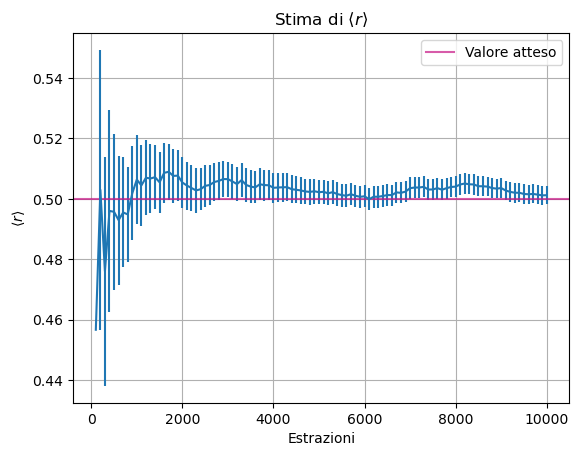

In [30]:
Mav=10000  #numero totale di estrazioni del generatore
Nav=100  #numero di blocchi
Lav=int(Mav/Nav)  #numero di estrazioni per blocco
x=np.arange(Nav)+1  #vettore delle ascisse dei punti plottati
x*=Lav  #in questo modo sulle ascisse metto il numero di estrazioni totali a cui corrisponde l'ultima estrazione del blocco plottato

ay=np.loadtxt("average.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
aerrorbars=np.loadtxt("average.dat", delimiter=" ", usecols=1, unpack="true")  #vettore delle barre d'errore dei punti plottati

plt.errorbar(x, ay, yerr=aerrorbars)
plt.axhline(y=0.5, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Estrazioni")
plt.ylabel(r"$\left<r\right>$")
plt.title(r"Stima di $\left<r\right>$")
plt.grid(True)
plt.legend()
plt.show()

## Figura 2

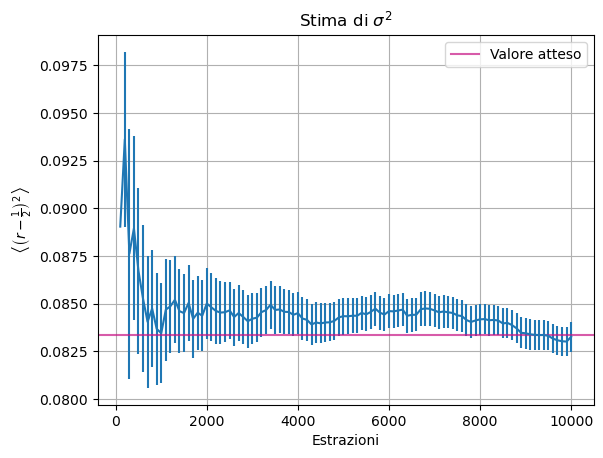

In [31]:
vy=np.loadtxt("variance.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore delle ordinate dei punti plottati
verrorbars=np.loadtxt("variance.dat", delimiter=" ", usecols=1, unpack="true")  #vettore delle barre d'errore dei punti plottati

plt.errorbar(x, vy, yerr=verrorbars)
plt.axhline(y=1/12, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Estrazioni")
plt.ylabel(r"$\left< \left( r-\frac{1}{2} \right) ^2 \right> $")
plt.title(r"Stima di $\sigma^2$")
plt.grid(True)
plt.legend()
plt.show()

## Chi quadro

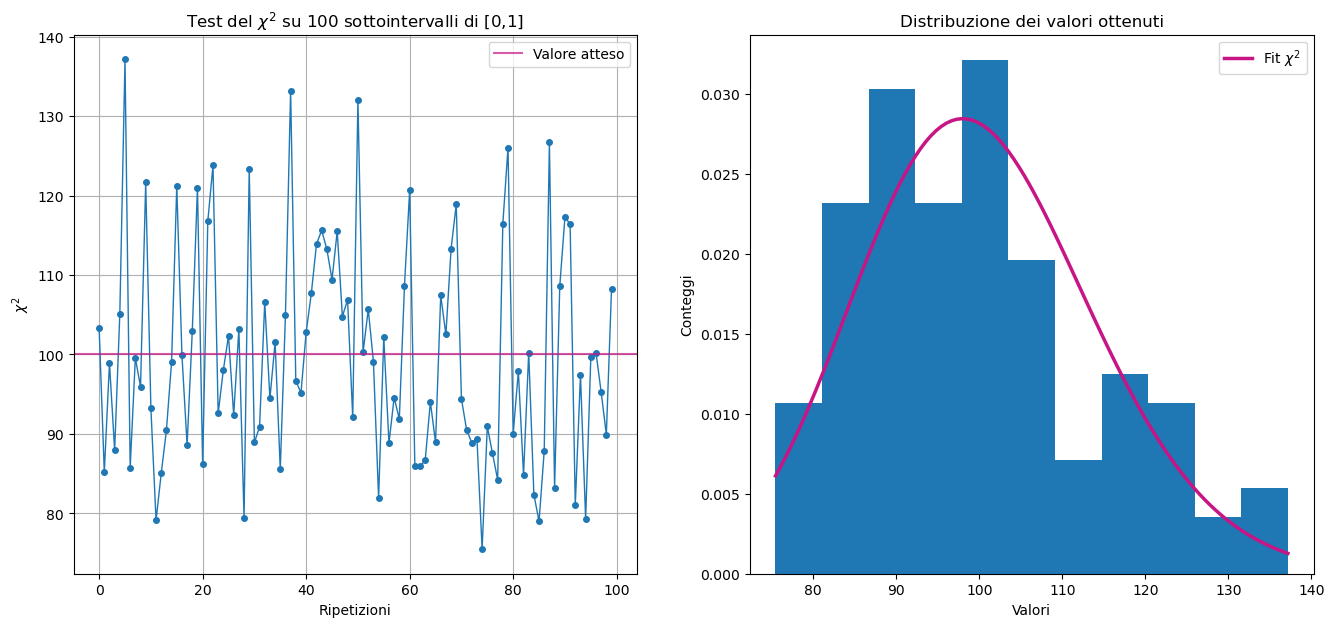

In [33]:
Mchi=100  #numero intervalli considerati
cx=np.arange(Mchi)  #vettore con le ascisse del plot
cy=np.loadtxt("chiquad.dat", delimiter=" ", usecols=0,  unpack="true")  #vettore con le ordinate del plot

dx=np.linspace(min(cy), max(cy), num=100)  #vettore per plottare il fit della distribuzione del chi2
cmean=100

fig ,(plt1, plt2) = plt.subplots(1, 2, figsize=(16, 7))

plt1.plot(cx, cy, marker='o', markersize=4, linewidth=1)
plt1.axhline(y=cmean, color="mediumvioletred", label="Valore atteso", alpha=0.7, linewidth=1.5)
plt1.set_xlabel("Ripetizioni")
plt1.set_ylabel(r"$\chi^2$")
plt1.set_title(r"Test del $\chi^2$ su 100 sottointervalli di [0,1]")
plt1.grid(True)
plt1.legend()

plt2.hist(cy, bins=11, density=True)
plt2.set_xlabel("Valori")
plt2.set_ylabel("Conteggi")
plt2.set_title("Distribuzione dei valori ottenuti")
plt2.plot(dx, chi2.pdf(dx, cmean), label=r"Fit $\chi^2$", color="mediumvioletred", linewidth=2.5)
plt2.legend()

plt.show()

# Esercizio 1.2

## Figura 1

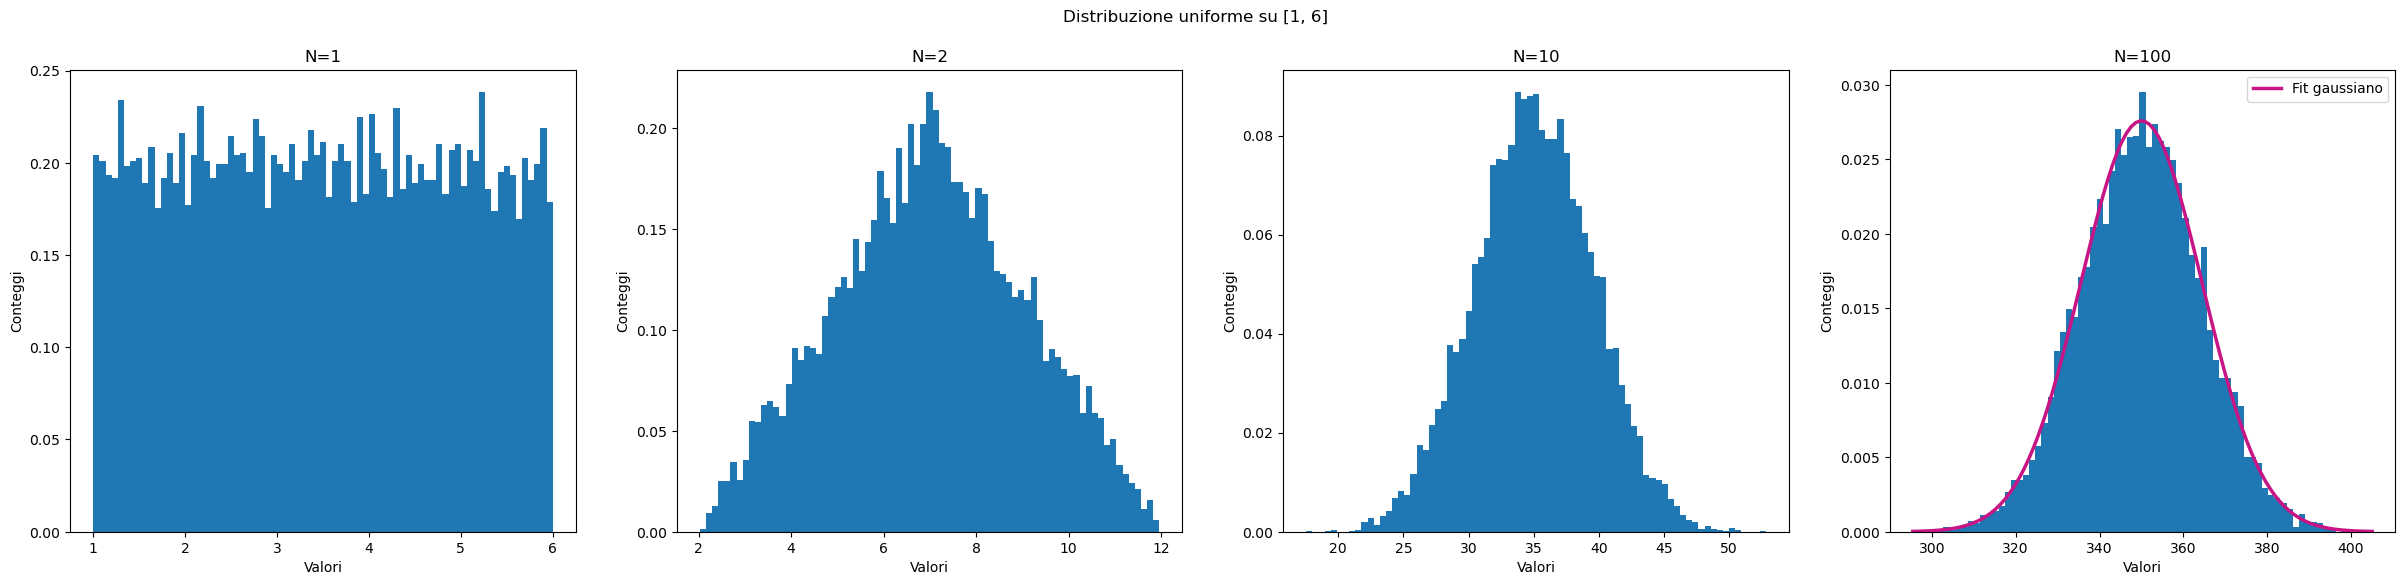

In [15]:
Mdist=10000
Bdist=75
U1s, U2s, U3s, U4s=np.loadtxt("unifdist.dat", delimiter=" ", usecols=(0, 1, 2, 3),  unpack="true")

(umu, usigma)=norm.fit(U4s)  #preparo il fit gaussiano per la figura con N=100
ufx=np.linspace(min(U4s), max(U4s), 100)

ufig ,(uax1, uax2, uax3, uax4) = plt.subplots(1, 4, figsize=(30, 6))

uax1.hist(U1s, bins=Bdist, density=True)
uax1.set_xlabel("Valori")
uax1.set_ylabel("Conteggi")
uax1.set_title("N=1")

uax2.hist(U2s, bins=Bdist, density=True)
uax2.set_xlabel("Valori")
uax2.set_ylabel("Conteggi")
uax2.set_title("N=2")

uax3.hist(U3s, bins=Bdist, density=True)
uax3.set_xlabel("Valori")
uax3.set_ylabel("Conteggi")
uax3.set_title("N=10")

uax4.hist(U4s, bins=Bdist, density=True)
uax4.set_xlabel("Valori")
uax4.set_ylabel("Conteggi")
uax4.set_title("N=100")
uax4.plot(ufx, norm.pdf(ufx, umu, usigma), label=r"Fit gaussiano", color="mediumvioletred", linewidth=2.5)
uax4.legend()

ufig.suptitle("Distribuzione uniforme su [1, 6]")
plt.show()

## Figura 2

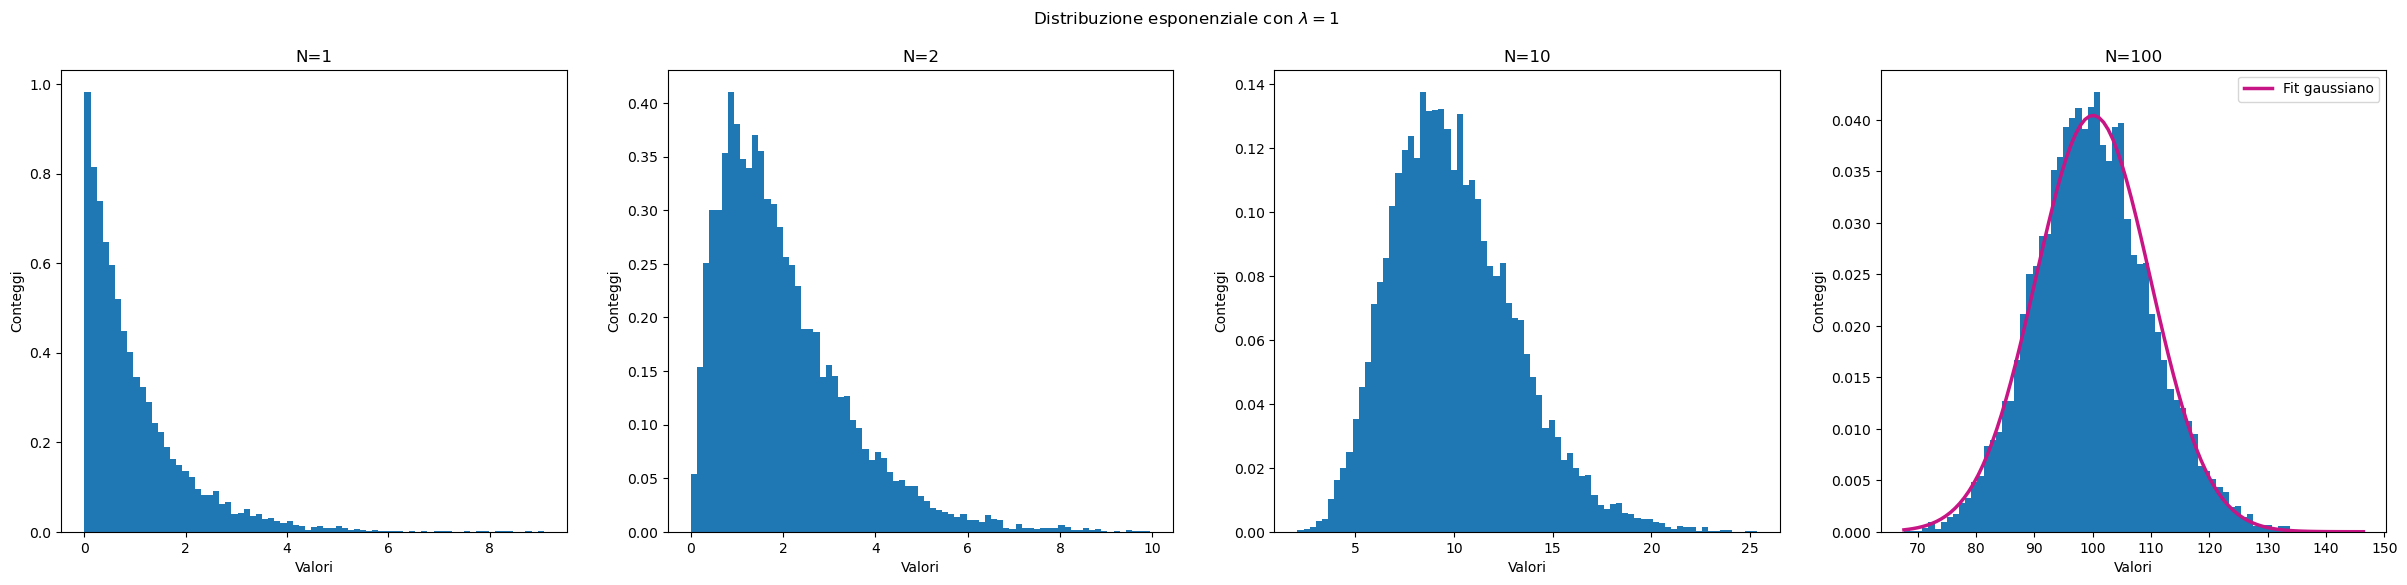

In [7]:
E1s, E2s, E3s, E4s=np.loadtxt("expdist.dat", delimiter=" ", usecols=(0, 1, 2, 3),  unpack="true")

(emu, esigma)=norm.fit(E4s)  #preparo il fit gaussiano per la figura con N=100
efx=np.linspace(min(E4s), max(E4s), 100)

efig ,(eax1, eax2, eax3, eax4) = plt.subplots(1, 4, figsize=(30, 6))

eax1.hist(E1s, bins=Bdist, density=True)
eax1.set_xlabel("Valori")
eax1.set_ylabel("Conteggi")
eax1.set_title("N=1")

eax2.hist(E2s, bins=Bdist, density=True)
eax2.set_xlabel("Valori")
eax2.set_ylabel("Conteggi")
eax2.set_title("N=2")

eax3.hist(E3s, bins=Bdist, density=True)
eax3.set_xlabel("Valori")
eax3.set_ylabel("Conteggi")
eax3.set_title("N=10")

eax4.hist(E4s, bins=Bdist, density=True)
eax4.set_xlabel("Valori")
eax4.set_ylabel("Conteggi")
eax4.set_title("N=100")
eax4.plot(efx, norm.pdf(efx, emu, esigma), label=r"Fit gaussiano", color="mediumvioletred", linewidth=2.5)
eax4.legend()

efig.suptitle(r"Distribuzione esponenziale con $\lambda=1$")
plt.show()

## Figura 3

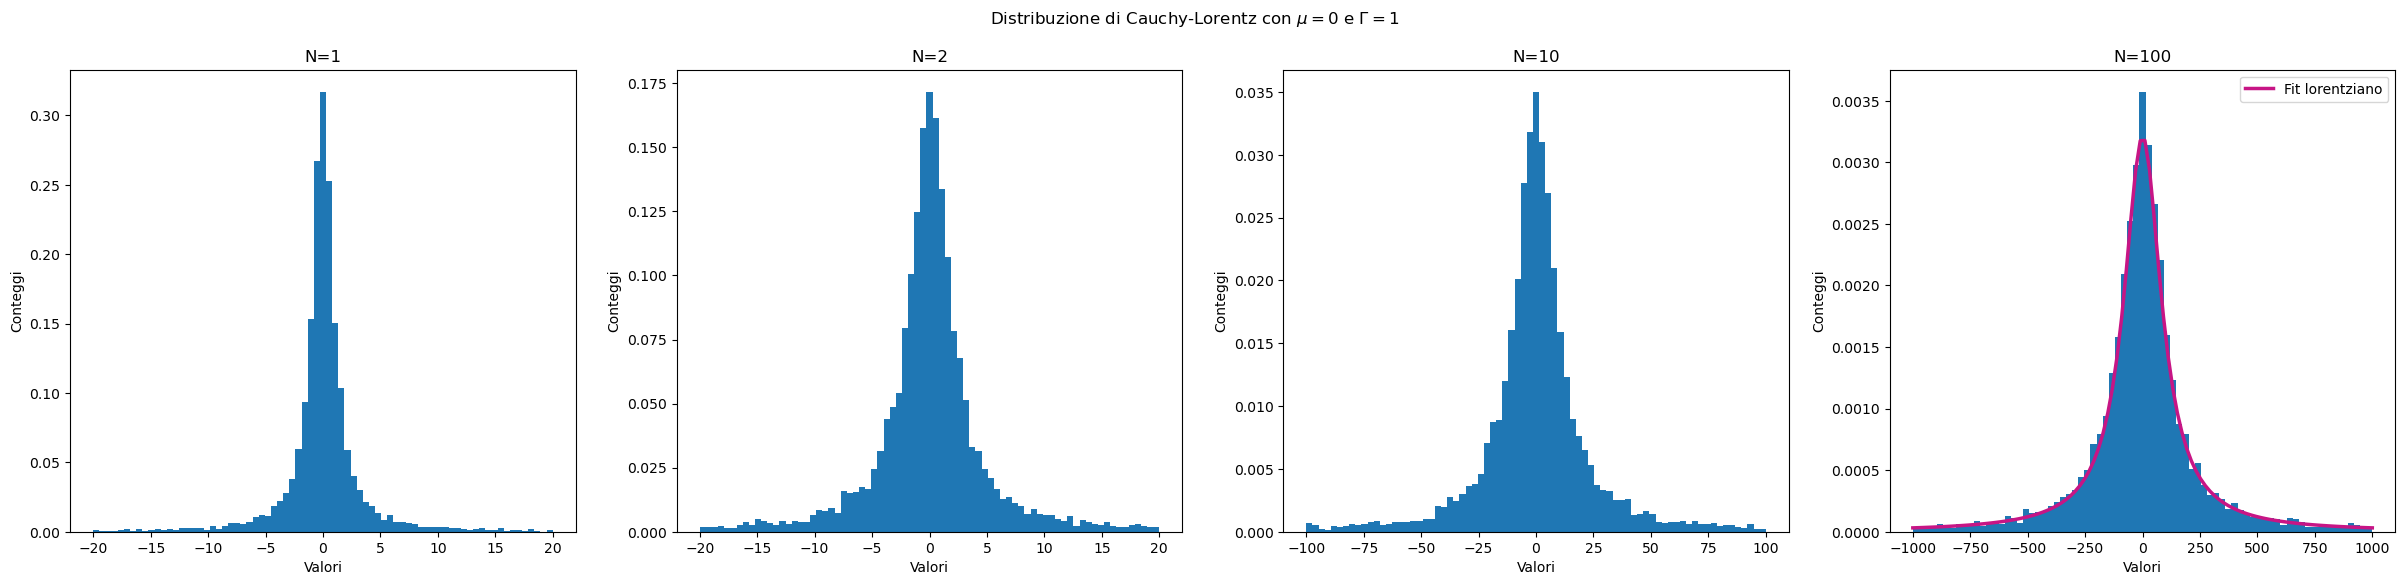

In [16]:
L1s, L2s, L3s, L4s=np.loadtxt("lordist.dat", delimiter=" ", usecols=(0, 1, 2, 3),  unpack="true")

(lmu, lgamma)=cauchy.fit(L4s)  #preparo il fit lorentziano per la figura con N=100
lfx=np.linspace(-1000, 1000, 100)

lfig ,(lax1, lax2, lax3, lax4) = plt.subplots(1, 4, figsize=(30, 6))

lax1.hist(L1s, bins=Bdist, density=True, range=(-20, 20))
lax1.set_xlabel("Valori")
lax1.set_ylabel("Conteggi")
lax1.set_title("N=1")

lax2.hist(L2s, bins=Bdist, density=True, range=(-20, 20))
lax2.set_xlabel("Valori")
lax2.set_ylabel("Conteggi")
lax2.set_title("N=2")

lax3.hist(L3s, bins=Bdist, density=True, range=(-100, 100))
lax3.set_xlabel("Valori")
lax3.set_ylabel("Conteggi")
lax3.set_title("N=10")

lax4.hist(L4s, bins=Bdist, density=True, range=(-1000, 1000))
lax4.set_xlabel("Valori")
lax4.set_ylabel("Conteggi")
lax4.set_title("N=100")
lax4.plot(lfx, cauchy.pdf(lfx, lmu, lgamma), label=r"Fit lorentziano", color="mediumvioletred", linewidth=2.5)
lax4.legend()

lfig.suptitle(r"Distribuzione di Cauchy-Lorentz con $\mu=0$ e $\Gamma=1$")
plt.show()

# Esercizio 1.3

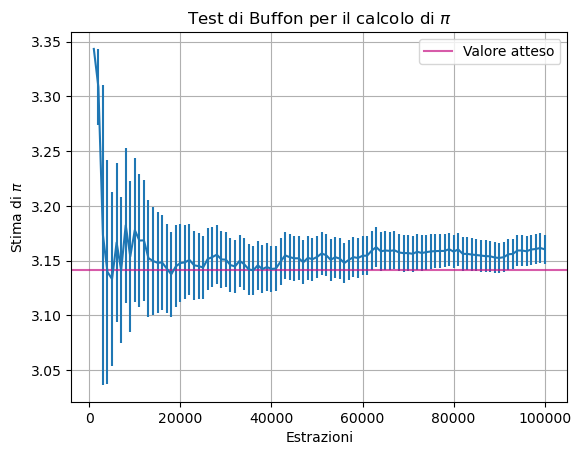

In [12]:
Mb=100000  #numero totale di estrazioni del generatore
Bb=100  #numero di blocchi
Tb=int(Mb/Bb)  #numero di estrazioni per blocco
bx=np.arange(Bb)+1  #vettore delle ascisse dei punti plottati
bx*=Tb  #in questo modo sulle ascisse metto il numero di estrazioni totali a cui corrisponde l'ultima estrazione del blocco plottato

by, berrorbars=np.loadtxt("buffon.dat", delimiter=" ", usecols=(0, 1),  unpack="true")  #vettori delle ordinate e delle barre d'errore dei punti plottati

plt.errorbar(bx, by, yerr=berrorbars)
plt.axhline(y=math.pi, color="mediumvioletred", label="Valore atteso", alpha=0.7)
plt.xlabel("Estrazioni")
plt.ylabel(r"Stima di $\pi$")
plt.title(r"Test di Buffon per il calcolo di $\pi$")
plt.grid(True)
plt.legend()
plt.show()